In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
df = pd.read_csv('WineQT.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#stats info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#preprocessing step
#check for null values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


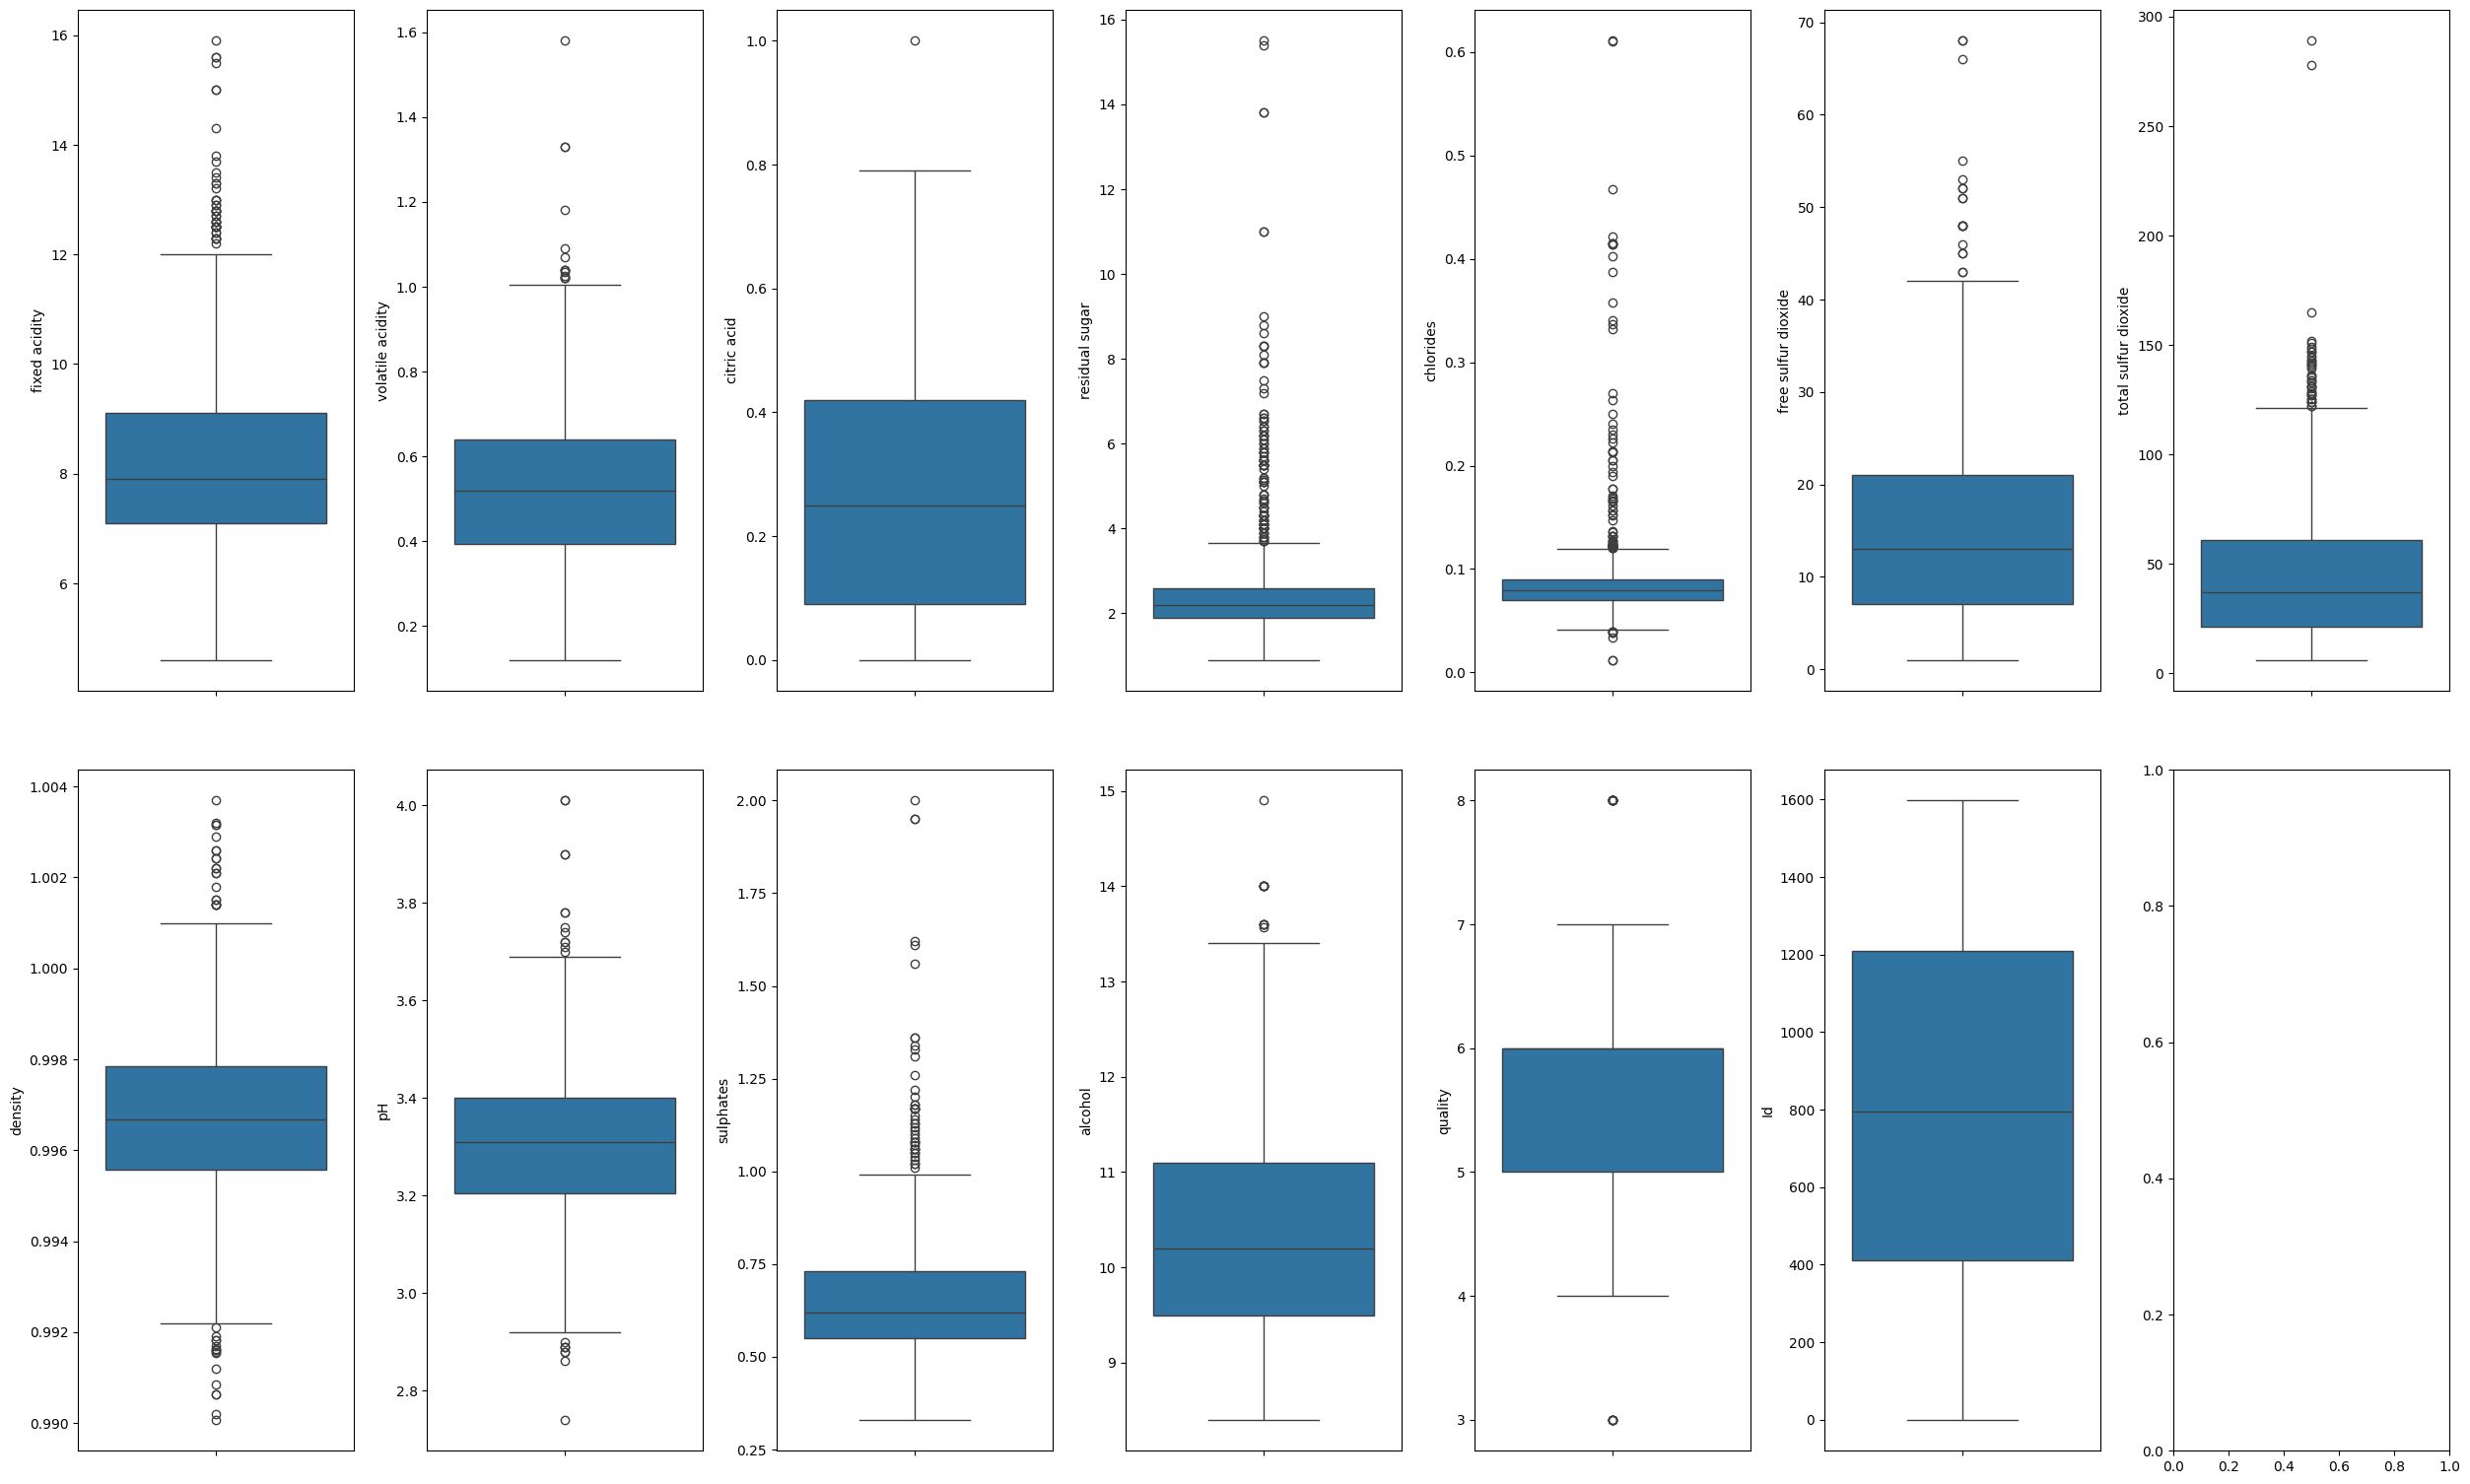

In [ ]:
#create box plots (exploratory analysis)
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(25,15))
index=0
ax = ax.flatten()
for col, value in df.items():
  if col != 'type':
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

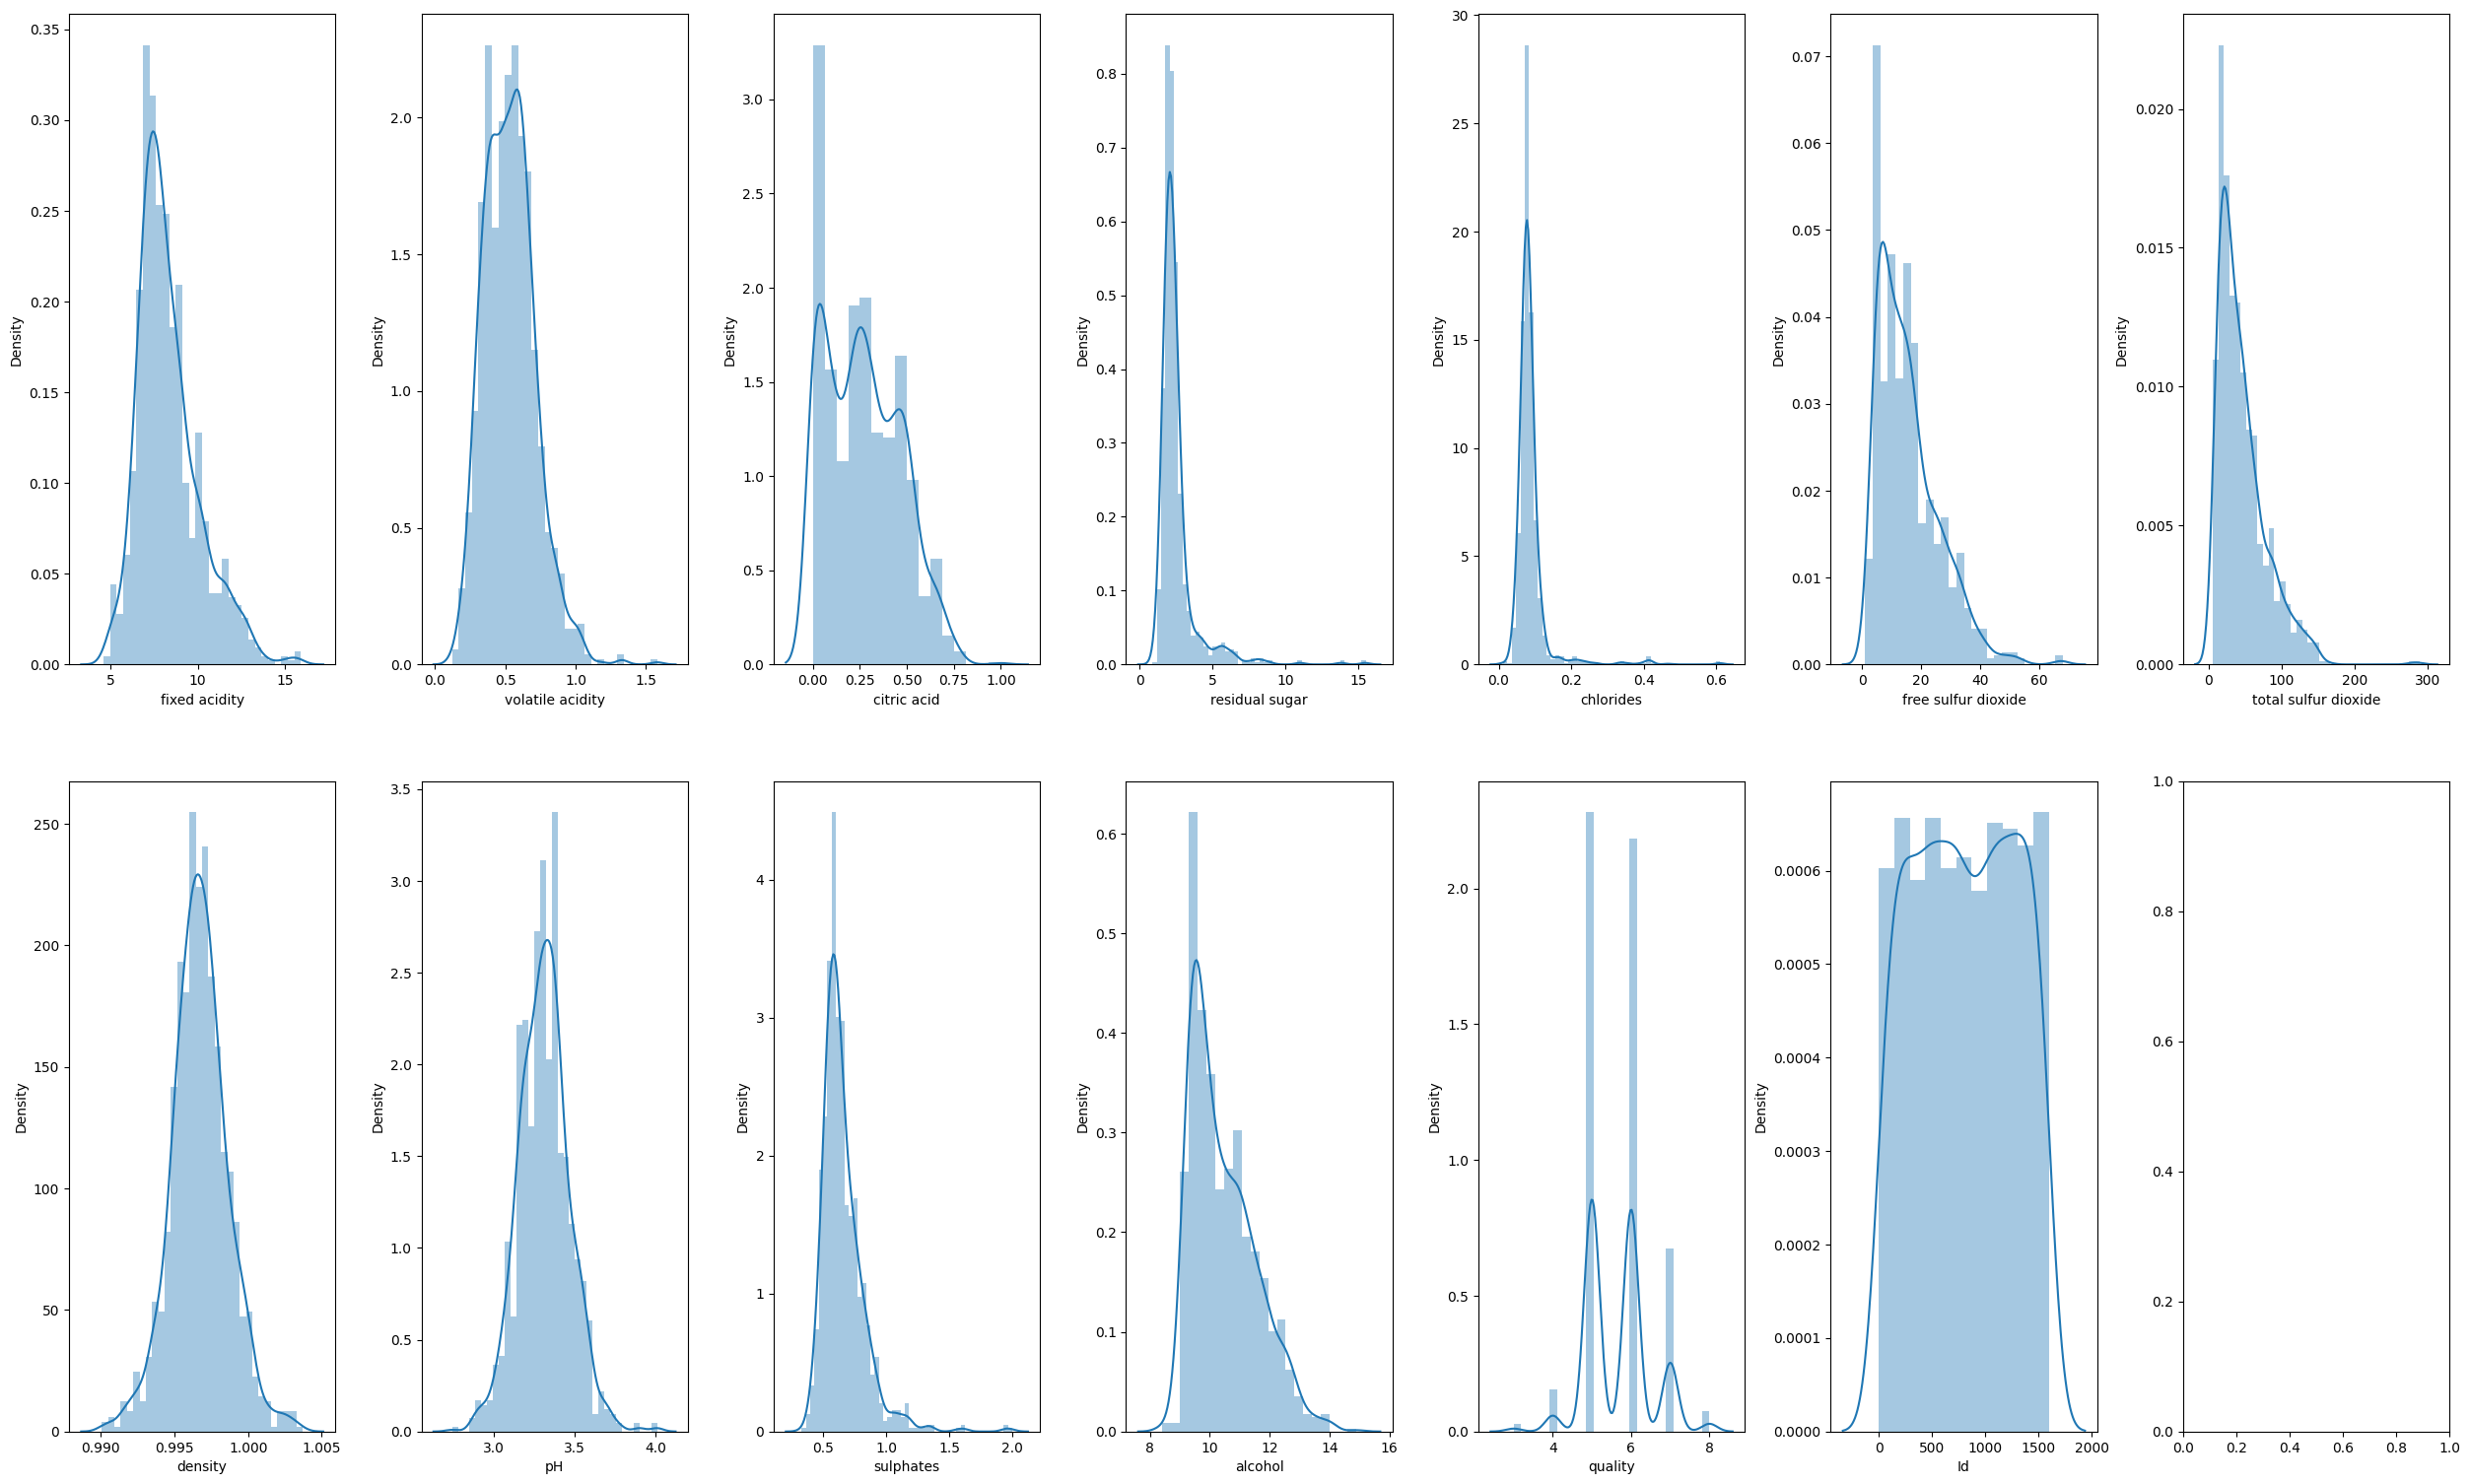

In [ ]:
#creating a distributed plot
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(25,15))
index=0
ax = ax.flatten()
for col, value in df.items():
  if col != 'type':
    sns.distplot(value, ax=ax[index])
    index += 1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
Q1 = df['residual sugar'].quantile(0.25)  # 25th percentile (First quartile)
Q3 = df['residual sugar'].quantile(0.65)  # 75th percentile (Third quartile)
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1 * IQR  # Lower limit for outliers
upper_bound = Q3 + 1 * IQR  # Upper limit for outliers
df_cleaned = df[(df['residual sugar'] >= lower_bound) & (df['residual sugar'] <= upper_bound)]



In [ ]:
#log transformation
df['residual sugar'] = np.log(1+df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Density'>

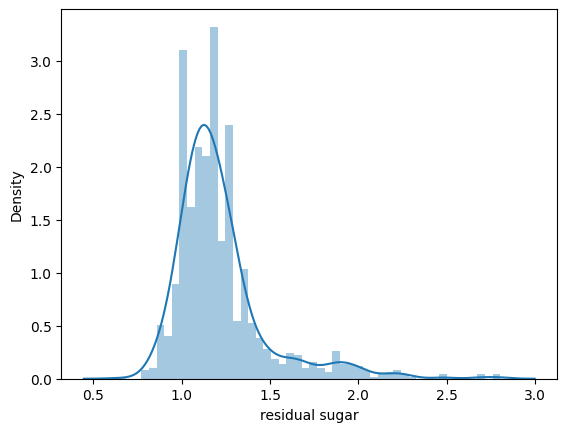

In [ ]:
sns.distplot(df[''])

In [ ]:
df['citric acid'] = np.log(1+df['citric acid'])

<Axes: xlabel='citric acid', ylabel='Density'>

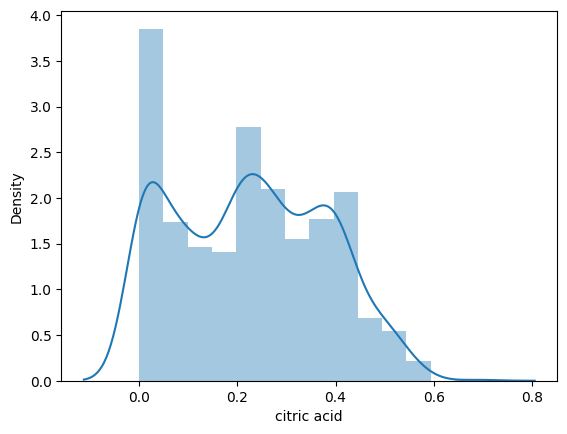

In [ ]:
sns.distplot(df['citric acid'])

In [ ]:
df['free sulfur dioxide'] = np.log(1+df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

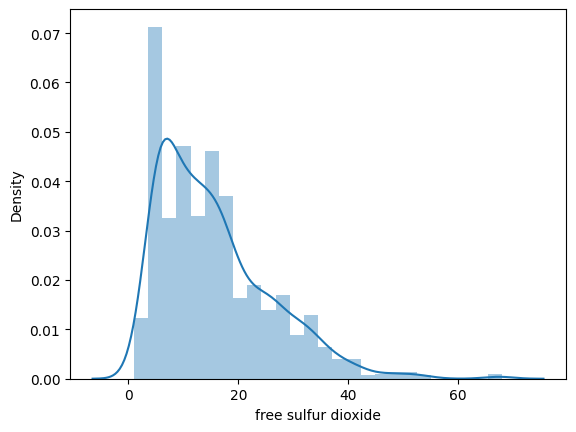

In [ ]:
sns.distplot(df['free sulfur dioxide'])

In [ ]:
df['total sulfur dioxide'] = np.log(1+df['total sulfur dioxide'])

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

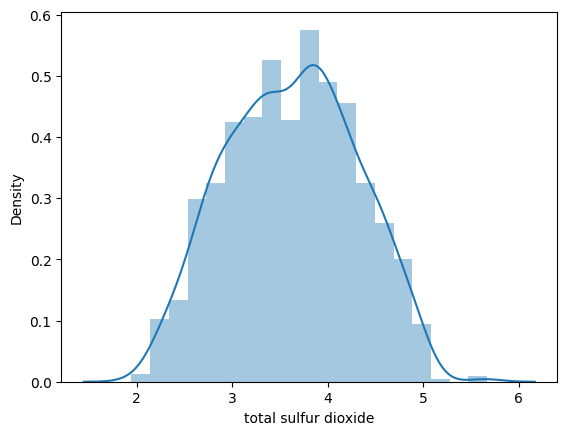

In [ ]:
sns.distplot(df['total sulfur dioxide'])

In [ ]:
df['alcohol'] = np.log(1+df['alcohol'])

<Axes: xlabel='alcohol', ylabel='Density'>

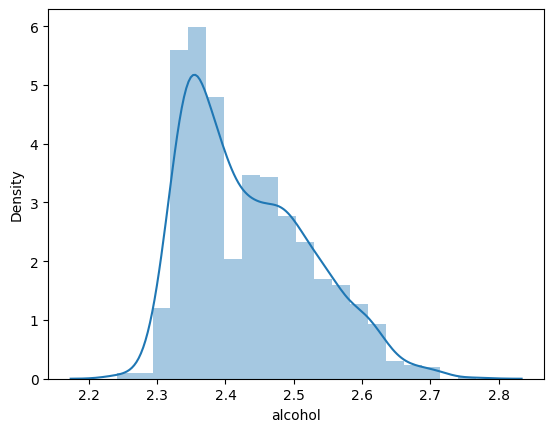

In [ ]:
sns.distplot(df['alcohol'])

<Axes: ylabel='count'>

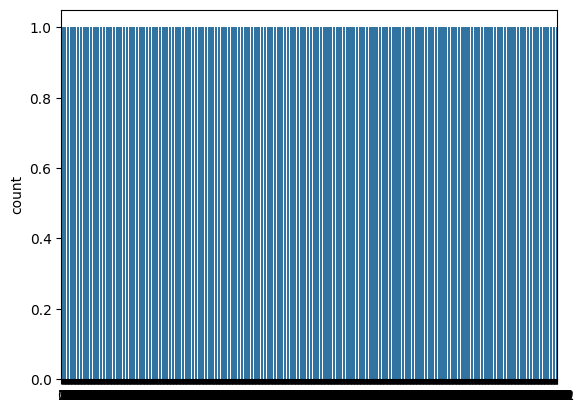

In [ ]:
sns.countplot(df['quality'])

<Axes: >

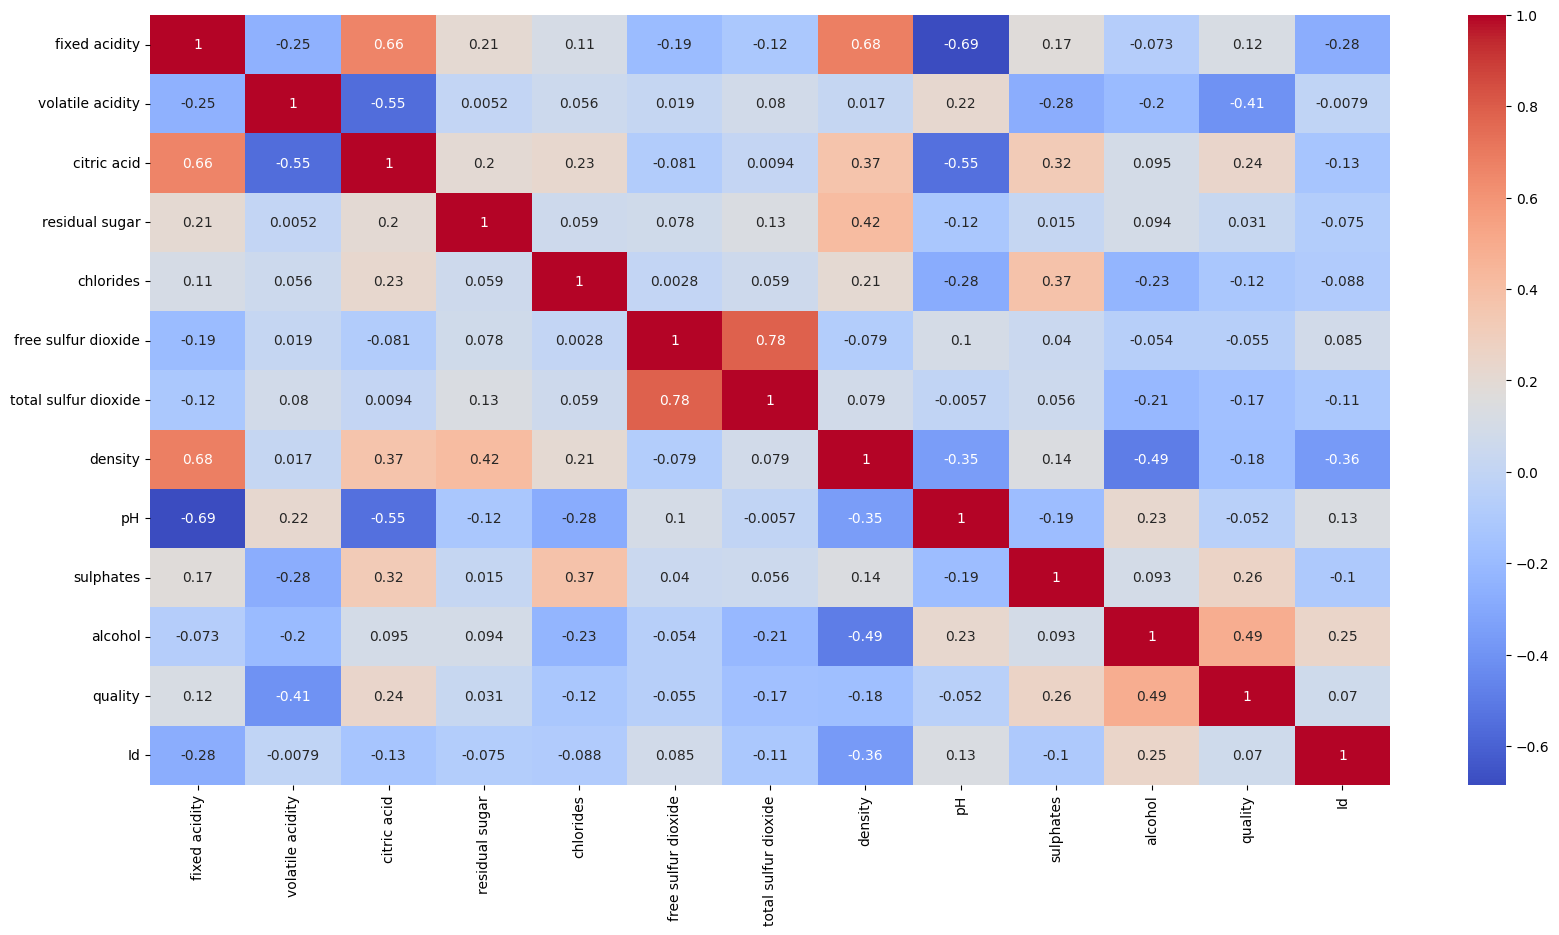

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
x = df.drop(columns=['quality', 'Id'])
y =df['quality']

In [ ]:
y.value_counts()

,count
quality,
5,483
6,483
7,483
4,483
8,483
3,483


In [ ]:
#class imbalancement
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
#transform ds
x, y= oversample.fit_resample(x,y)

In [ ]:
#model training
#can use classification and regression
#classifying function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
  #train the model
  model.fit(x_train, y_train)
  print("accuracy:", model.score(x_test, y_test)*100)
  #cross validation
  score = cross_val_score(model, x, y, cv=5)
  print("cv score:", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

model = LogisticRegression()

def classify(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
  # Train the model
  model.fit(x_train, y_train)

  # Calculate and print accuracy
  accuracy = model.score(x_test, y_test) * 100
  print("Accuracy:", accuracy)

  # Calculate and print cross-validation score
  cv_score = cross_val_score(model, x, y, cv=5)  # cv=5 for 5-fold cross-validation
  print("CV Score:", np.mean(cv_score) * 100)

# Call the classify function to train and evaluate the model
classify(model, x, y)

Accuracy: 53.6551724137931
CV Score: 50.3800845691144


In [ ]:
from datetime import datetime

timestamp= datetime.now().strftime("%Y%m%d_%H%M%S")
log_entry = f' {timestamp} system event log'
print(log_entry)

with open('system.txt','a') as file:
  file.write(log_entry)

print("file log added")

 20250324_210412 system event log
file log added


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 78.89655172413794
CV Score: 73.94818652849742


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model = RandomForestClassifier()

classify(model, x, y)

Accuracy: 86.06896551724138
CV Score: 81.74611398963731


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy: 86.62068965517241
CV Score: 82.50562801500804


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, x, y)
#install xgboost


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]